In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#understanding the data types of the columns
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS', 'STATUS'], inplace=True, axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [4]:
#Identifying outliers in the ASK_AMT column as a numerical column
# Calculate IQR for ASK_AMT

Q1 = application_df['ASK_AMT'].quantile(0.25)
Q3 = application_df['ASK_AMT'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_ask_amt = application_df[(application_df['ASK_AMT'] < (Q1 - 1.5 * IQR)) | (application_df['ASK_AMT'] > (Q3 + 1.5 * IQR))]

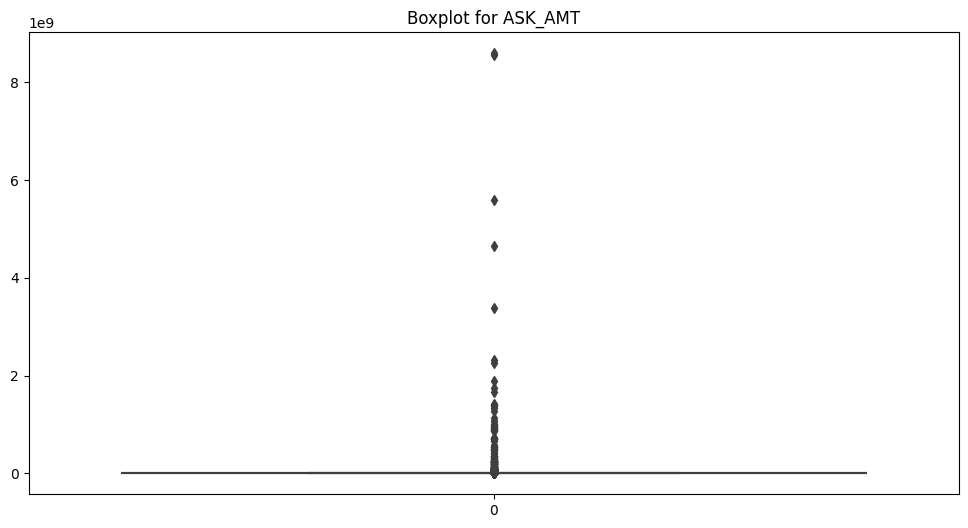

In [5]:
#visualising the outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(application_df['ASK_AMT'])
plt.title("Boxplot for ASK_AMT")
plt.show()

In [15]:
# Removing outliers from ASK_AMT
application_df_cleaned = application_df[(application_df['ASK_AMT'] >= lower_bound) & (application_df['ASK_AMT'] <= upper_bound)]

application_df_cleaned.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
5,T3,Independent,C1200,Preservation,Trust,0,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [16]:
# Determine the number of unique values in each column.
unique_counts = application_df_cleaned.nunique()

unique_counts

APPLICATION_TYPE     12
AFFILIATION           6
CLASSIFICATION       65
USE_CASE              5
ORGANIZATION          4
INCOME_AMT            9
ASK_AMT             656
IS_SUCCESSFUL         2
dtype: int64

In [17]:
# Look at APPLICATION_TYPE value counts for binning

application_type_counts = application_df_cleaned["APPLICATION_TYPE"].value_counts()

application_type_counts

T3     20086
T4      1331
T19      999
T5       894
T6       882
T8       669
T7       633
T10      508
T13       54
T9        18
T12       13
T2         6
Name: APPLICATION_TYPE, dtype: int64

In [18]:
len(application_df_cleaned)

26093

In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 0.03 * len(application_df_cleaned)  # 3% of the data
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index
application_types_to_replace


# Replace in dataframe
for app in application_types_to_replace:
    application_df_cleaned['APPLICATION_TYPE'] = application_df_cleaned['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df_cleaned['APPLICATION_TYPE'].value_counts()

<ipython-input-19-a15b6a02c5c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_df_cleaned['APPLICATION_TYPE'] = application_df_cleaned['APPLICATION_TYPE'].replace(app,"Other")


T3       20086
Other     1901
T4        1331
T19        999
T5         894
T6         882
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df_cleaned["CLASSIFICATION"].value_counts()
classification_counts

C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
         ...  
C1732        1
C1728        1
C4120        1
C1245        1
C2150        1
Name: CLASSIFICATION, Length: 65, dtype: int64

In [21]:
# You may find it helpful to look at CLASSIFICATION value counts >1

classifications_to_consider = classification_counts[classification_counts > 1]
classifications_to_consider

C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
C7000      546
C1700      223
C4000      129
C5000      106
C1270       89
C2700       75
C7100       62
C2800       61
C1280       46
C1300       42
C1230       35
C2300       28
C1240       28
C1400       27
C7200       20
C6000       14
C8000       13
C1250       13
C7120       11
C1278       10
C1237        9
C8200        9
C1238        9
C1235        9
C1500        7
C1720        6
C1257        5
C7210        5
C2400        4
C1600        4
C4100        4
C1260        3
C1800        3
C1267        2
C1246        2
C1256        2
C0           2
Name: CLASSIFICATION, dtype: int64

In [22]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cutoff_classification = 400

classifications_to_replace = classification_counts[classification_counts < cutoff_classification].index
classifications_to_replace


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1478
C7000      777
C2561        1
C8210        1
C2170        1
C5200        1
C1820        1
C1900        1
Name: CLASSIFICATION, dtype: int64

In [24]:
# Convert categorical data to numeric with `pd.get_dummies`
data_encoded = pd.get_dummies(application_df_cleaned)
data_encoded.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
5,5000,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,5000,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
# Split our preprocessed data into our features and target arrays
X = data_encoded.copy()
X.drop(columns="IS_SUCCESSFUL", axis=1, inplace=True)
y = data_encoded["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

X.head()

,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,5000,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,5000,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
9,5000,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((19569, 96), (6524, 96))

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
from tensorflow.keras.layers import LeakyReLU
nn_optimise = tf.keras.models.Sequential()

input_features = X_train_scaled.shape[1]


# First hidden layer
nn_optimise.add(tf.keras.layers.Dense(units=input_features*2, input_dim=input_features))
nn_optimise.add(LeakyReLU(alpha=0.01))

# Second hidden layer
nn_optimise.add(tf.keras.layers.Dense(units=input_features, activation='relu'))

# Output layer
nn_optimise.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_optimise.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               18624     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                18528     
                                                                 
 dense_2 (Dense)             (None, 1)                 97        
                                                                 
Total params: 37249 (145.50 KB)
Trainable params: 37249 (145.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)
nn_optimise.compile(optimizer=optimizer , loss="binary_crossentropy",  metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn_optimise.fit(X_train_scaled, y_train, epochs=120)

Epoch 1/120
612/612 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7387
Epoch 2/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5392 - accuracy: 0.7459
Epoch 3/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7476
Epoch 4/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7478
Epoch 5/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7503
Epoch 6/120
612/612 [==============================] - 2s 3ms/step - loss: 0.5317 - accuracy: 0.7498
Epoch 7/120
612/612 [==============================] - 2s 3ms/step - loss: 0.5302 - accuracy: 0.7515
Epoch 8/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7500
Epoch 9/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7503
Epoch 10/120
612/612 [==============================] - 1s 2ms/step - loss: 0.5284 - accura

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimise.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5658 - accuracy: 0.7509 - 422ms/epoch - 2ms/step
Loss: 0.565788209438324, Accuracy: 0.7509196996688843


In [32]:
# Exports the model to HDF5 file
nn_optimise.save('AlphabetSoupCharity_Optimization.h5')
